<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Problem-statement---1" data-toc-modified-id="Problem-statement---1-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Problem statement - 1</a></span><ul class="toc-item"><li><span><a href="#Exploratory-Data-Analysis" data-toc-modified-id="Exploratory-Data-Analysis-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Exploratory Data Analysis</a></span></li><li><span><a href="#SARIMAX" data-toc-modified-id="SARIMAX-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>SARIMAX</a></span></li><li><span><a href="#Prophet" data-toc-modified-id="Prophet-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Prophet</a></span></li></ul></li><li><span><a href="#Problem-statement---2" data-toc-modified-id="Problem-statement---2-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Problem statement - 2</a></span><ul class="toc-item"><li><span><a href="#Exploratory-Data-Analysis" data-toc-modified-id="Exploratory-Data-Analysis-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Exploratory Data Analysis</a></span></li><li><span><a href="#SARIMAX" data-toc-modified-id="SARIMAX-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>SARIMAX</a></span></li><li><span><a href="#Prophet" data-toc-modified-id="Prophet-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Prophet</a></span></li></ul></li></ul></div>

### Problem statement - 1

Forecast the Airlines Passengers data set. Prepare a document for each model explaining how many dummy variables you have created and RMSE value for each model. Finally which model you will use for Forecasting.

In [1]:
# Necessary libraries
import pandas as pd
import itertools
import numpy as np

#Visualization
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
%matplotlib inline

# Model libraries
import statsmodels.api as sm
from prophet import Prophet
from statsmodels.tsa.statespace import sarimax

# Stationarity test library
from statsmodels.tsa.stattools import adfuller

# Warnings
import warnings
warnings.filterwarnings("ignore")

#### Exploratory Data Analysis

In [2]:
# Loading dataset
airline = pd.read_excel(r".\Airlines.xlsx")

# View of dataset
airline.head()

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121


In [3]:
#1. Shape of dataset
airline.shape

(96, 2)

In [4]:
#2. Technical information
airline.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Month       96 non-null     datetime64[ns]
 1   Passengers  96 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.6 KB


In [5]:
#3. Presence of null values
airline.isnull().sum()

Month         0
Passengers    0
dtype: int64

In [6]:
#4. Presence of duplicate records
airline.duplicated().sum()

0

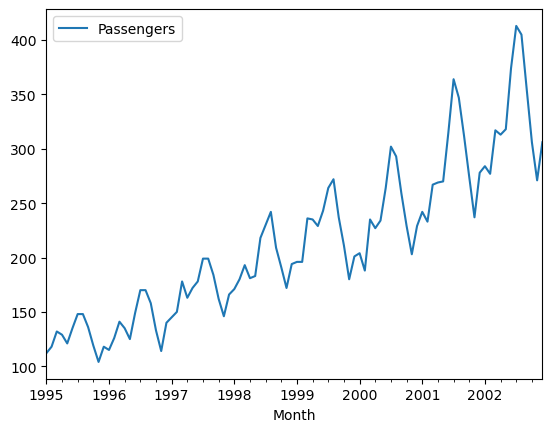

In [7]:
#5. Dataset visulization
airline.plot(kind='line', x='Month', y='Passengers')
plt.show()

In [8]:
# Setting index
airline = airline.set_index('Month')
airline.head()

,Passengers
Month,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121


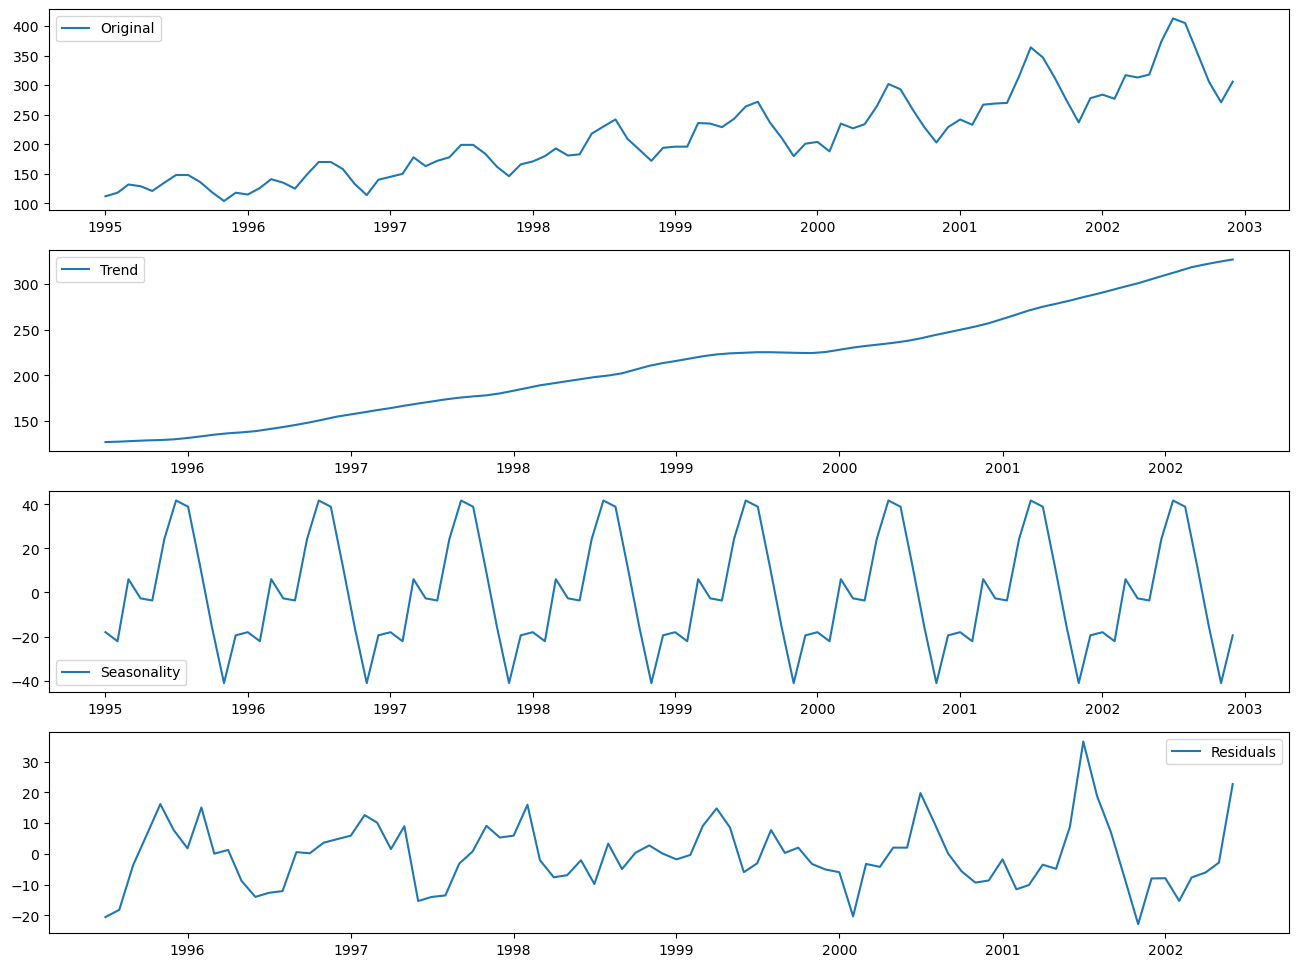

In [9]:
# checking trend, Seasonality and Residuals

rcParams['figure.figsize'] = (16, 12)

decomposition = seasonal_decompose(airline)
trend = decomposition.trend
seasonal = decomposition.seasonal
residuals = decomposition.resid

plt.subplot(411)
plt.plot(airline, label='Original')
plt.legend(loc='best')

plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')

plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='best')

plt.subplot(414)
plt.plot(residuals, label='Residuals')
plt.legend(loc='best')
plt.show()

In [10]:
# Checking stationarity of dataset

adftest = adfuller(airline)
if adftest[1] > 0.05:
    print(f'No Stationarity in Dataset since pvlaue {adftest[1]} > 0.05')
else:
    print(f'Stationarity exists in the Dataset since pvlaue {adftest[1]} < 0.05')

No Stationarity in Dataset since pvlaue 0.9968250481137263 > 0.05


Observation:
1. Dataset has 96 records and 2 columns.
2. Data types are consistent
3. No null values and duplicates present
4. Up trend and seasonality can be observed in the dataset
5. Dataset is not stationary.
6. Since, seasonality exists in the dataset SARIMAX model has to be used for forecasting. 

#### SARIMAX

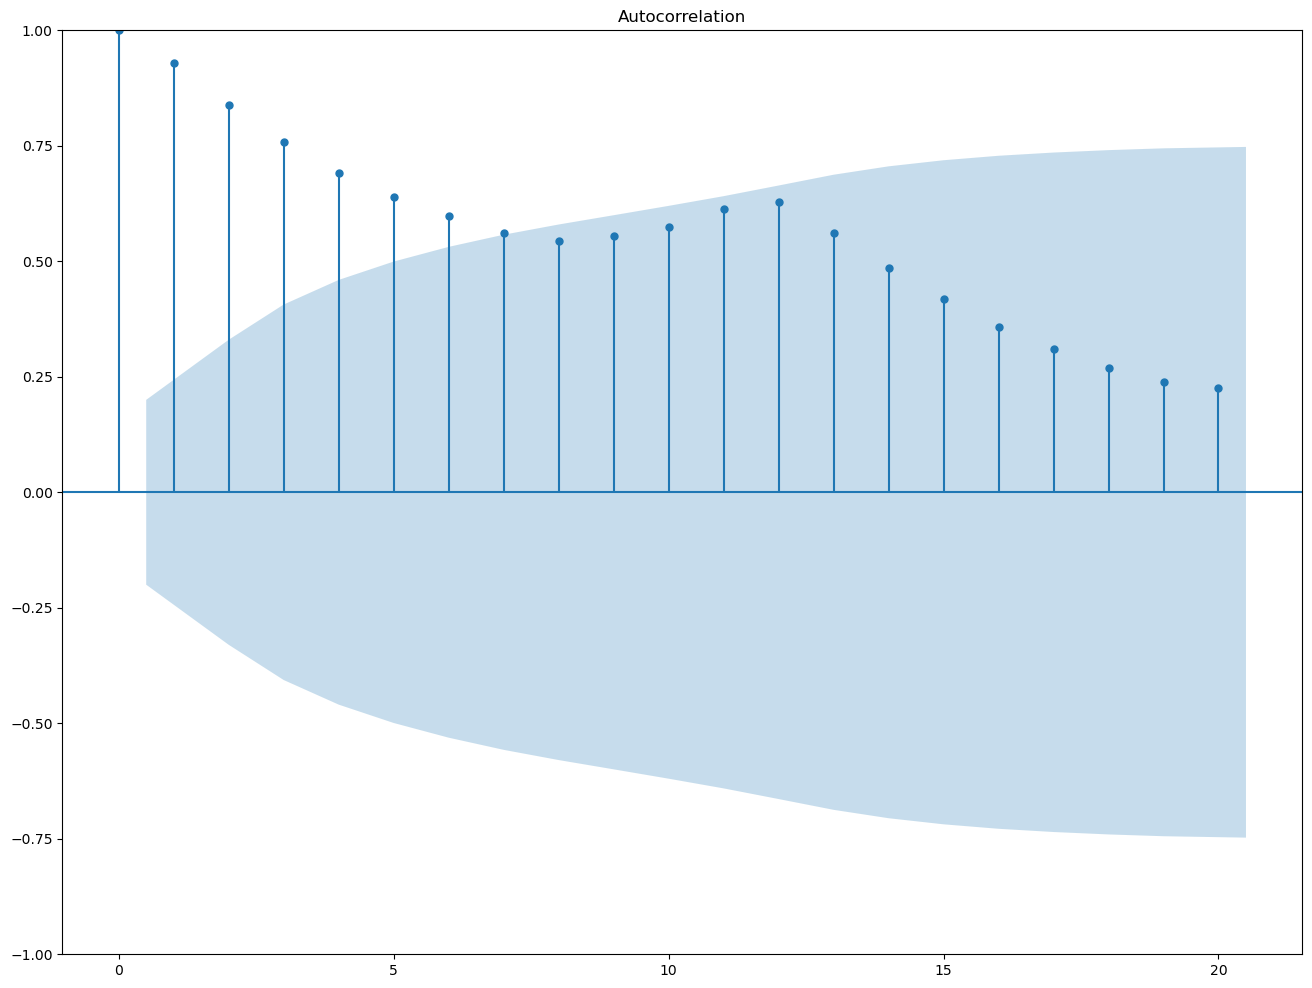

In [11]:
# Fitting SARIMAX model for forecasting
# Finding p, d, q values using acf and pacf plots

acf = plot_acf(airline['Passengers'])
# acf plot gives p value and here it is 7. 7 points crossing upper bound

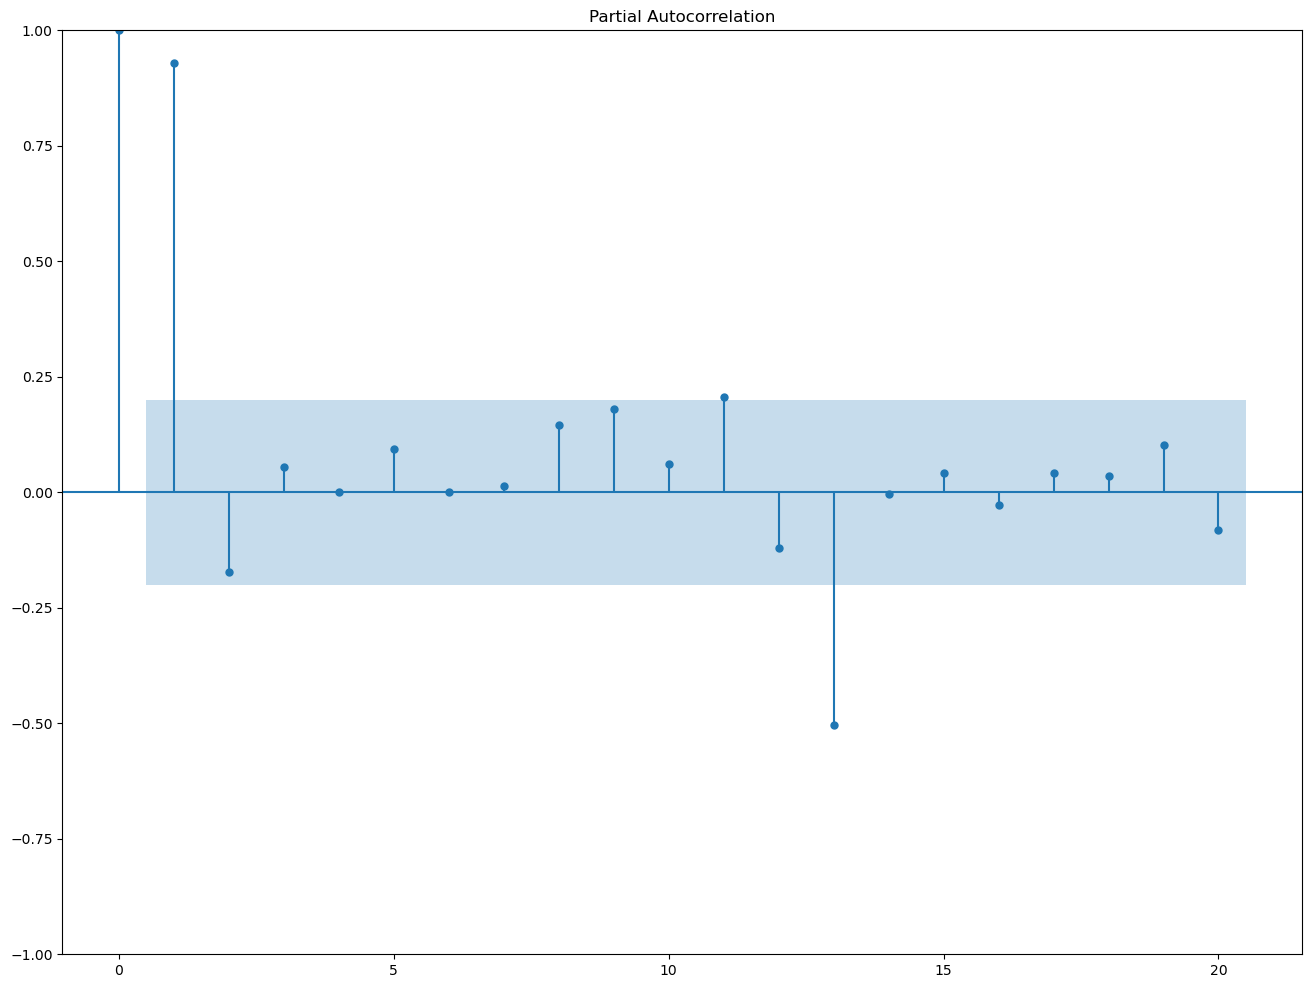

In [12]:
pacf = plot_pacf(airline['Passengers'])
# pacf plot gives q value and here it is 3. 3 points crossing boundaries

In [13]:
# No differencing done i.e. d = 0
sarima = sarimax.SARIMAX(airline, order=(7, 0, 3), seasonal_order=(1, 0, 1, 12))
result = sarima.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                           Passengers   No. Observations:                   96
Model:             SARIMAX(7, 0, 3)x(1, 0, [1], 12)   Log Likelihood                -362.710
Date:                              Sun, 24 Dec 2023   AIC                            751.420
Time:                                      22:14:14   BIC                            784.756
Sample:                                  01-01-1995   HQIC                           764.895
                                       - 12-01-2002                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3555      5.475      0.065      0.948     -10.376      11.087
ar.L2          0.1635      0.422      0.388      0.698      -0.664       0.991
ar.L3          0.5137      1.054      0.487      0.626      -1.552       2.580
ar.L4         -0.2758      2.887     -0.096      0.924      -5.934       5.383
ar.L5          0.0456      0.319      0.143      0.887      -0.581       0.672
ar.L6          0.2348      0.266      0.881      0.378      -0.287       0.757
ar.L7         -0.0718      1.425     -0.050      0.960      -2.865       2.722
ma.L1          0.4927      5.492      0.090      0.929     -10.272      11.258
ma.L2          0.4311      4.787      0.090      0.928      -8.951       9.813
ma.L3         -0.3111      4.043     -0.077      0.939      -8.235       7.613
ar.S.L12       0.9571      0.042     22.951      0.000       0.875       1.039
ma.S.L12      -0.2165      0.151     -1.437      0.151      -0.512       0.079
sigma2        81.3352     14.570      5.582      0.000      52.779     109.892
===================================================================================
Ljung-Box (L1) (Q):                   0.07   Jarque-Bera (JB):                 5.53
Prob(Q):                              0.80   Prob(JB):                         0.06
Heteroskedasticity (H):               2.17   Skew:                             0.56
Prob(H) (two-sided):                  0.03   Kurtosis:                         3.36
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

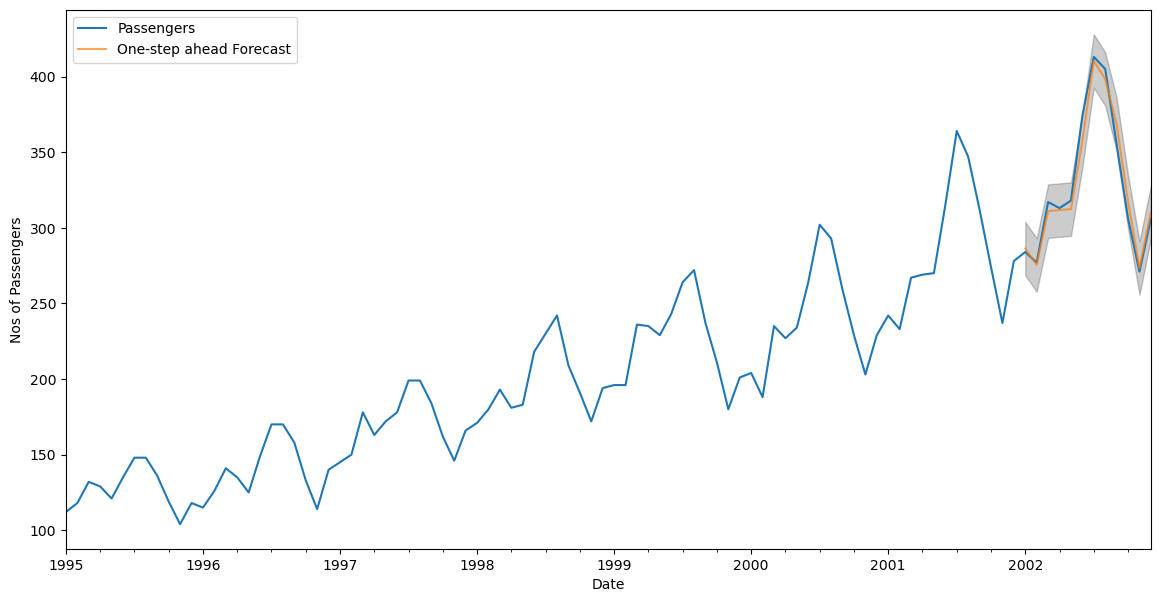

In [14]:
# Visualization of predictions 
pred = result.get_prediction(start=pd.to_datetime('2002-01-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = airline['1995':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Nos of Passengers')
plt.legend()
plt.show()

In [15]:
y_forecasted = pred.predicted_mean[1]
y_truth = airline['2002-01-01':]
mse = ((y_forecasted - y_truth) ** 2).mean()

print('The Mean Squared Error of our forecasts is {}'.format(round(mse['Passengers'], 2)))
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse['Passengers']), 2)))

The Mean Squared Error of our forecasts is 4891.25
The Root Mean Squared Error of our forecasts is 69.94


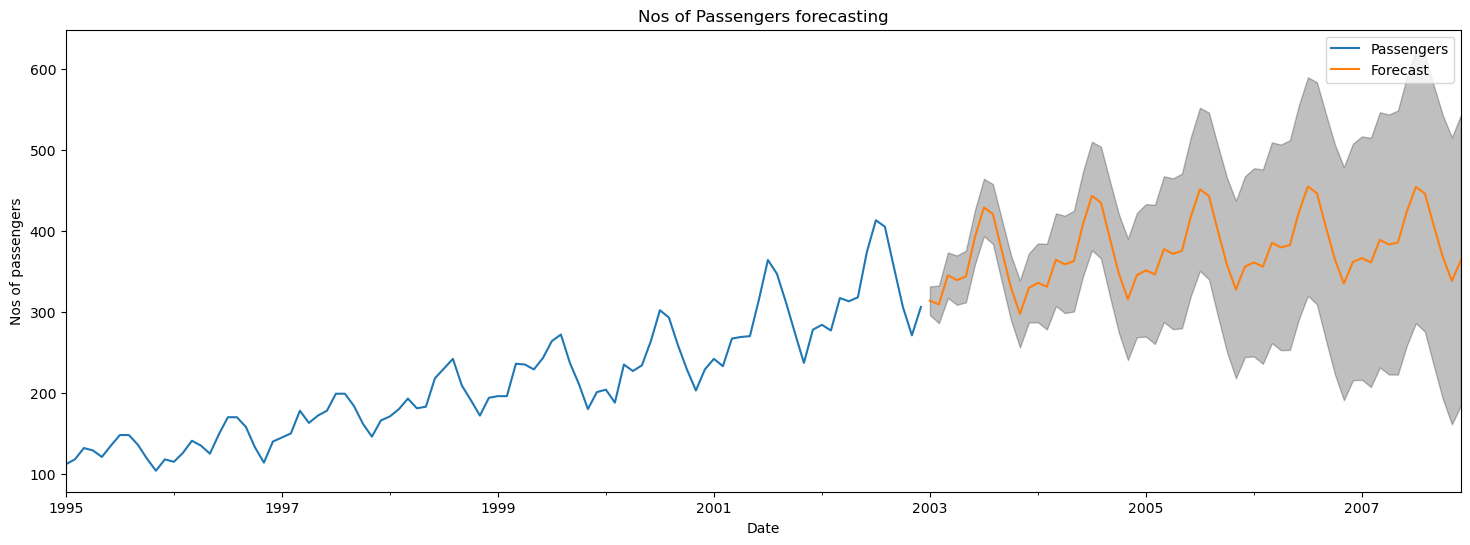

In [16]:
# Forecasting for 5 years
pred_uc = result.get_forecast(steps=60)
pred_ci = pred_uc.conf_int()
ax = airline.plot(label='observed', figsize=(18, 6))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Nos of passengers')
plt.legend(loc='best')
plt.title('Nos of Passengers forecasting')
plt.show()

In [17]:
# Findng rmse values using different variables
p = q = range(0, 3)
d = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 0, 2, 12)
SARIMAX: (0, 0, 2) x (0, 1, 0, 12)
SARIMAX: (0, 0, 2) x (0, 1, 1, 12)


In [18]:
aic = 1000
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(airline,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            pred = results.get_prediction(start=pd.to_datetime('2002-01-01'), dynamic=False)
            y_forecasted = pred.predicted_mean[1]
            y_truth = airline['2002-01-01':]
            mse = ((y_forecasted - y_truth) ** 2).mean()
            rmse = round(np.sqrt(mse['Passengers']), 2)
            print('ARIMA{}x{}12 - AIC:{} - RMSE:{}'.format(param, param_seasonal, results.aic, rmse))
            
            if results.aic < aic:
                rmse_value = rmse
                Order = param
                Seasonal_order = param_seasonal
                aic = results.aic
        except:
                continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:1301.7158787856208 - RMSE:331.43
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1069.8681142508312 - RMSE:208.03
ARIMA(0, 0, 0)x(0, 0, 2, 12)12 - AIC:3006.2672544020443 - RMSE:40604.98
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:817.6023833571672 - RMSE:105.7
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:678.6537300240159 - RMSE:80.53
ARIMA(0, 0, 0)x(0, 1, 2, 12)12 - AIC:2603.1110037960943 - RMSE:95.38
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:677.5531509102017 - RMSE:76.62
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:647.7939382089882 - RMSE:71.73
ARIMA(0, 0, 0)x(1, 0, 2, 12)12 - AIC:2649.6887696841086 - RMSE:46.79
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:654.0347495415085 - RMSE:71.64
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:606.5519478528274 - RMSE:81.05
ARIMA(0, 0, 0)x(1, 1, 2, 12)12 - AIC:2230.7310449209663 - RMSE:41331.15
ARIMA(0, 0, 0)x(2, 0, 0, 12)12 - AIC:578.1986290533534 - RMSE:81.79
ARIMA(0, 0, 0)x(2, 0, 1, 12)12 - AIC:573.3147641680795 - RMSE:71.06
ARIMA(0, 0, 0)x(2, 0, 2, 12)12 - A

ARIMA(1, 0, 0)x(2, 0, 0, 12)12 - AIC:523.7299223194642 - RMSE:76.89
ARIMA(1, 0, 0)x(2, 0, 1, 12)12 - AIC:520.6371061367954 - RMSE:71.19
ARIMA(1, 0, 0)x(2, 0, 2, 12)12 - AIC:2442.1508902943265 - RMSE:69.58
ARIMA(1, 0, 0)x(2, 1, 0, 12)12 - AIC:452.0741371963633 - RMSE:72.15
ARIMA(1, 0, 0)x(2, 1, 1, 12)12 - AIC:454.0963042831337 - RMSE:72.28
ARIMA(1, 0, 0)x(2, 1, 2, 12)12 - AIC:456.0412122621286 - RMSE:72.77
ARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:856.2120808151199 - RMSE:67.68
ARIMA(1, 0, 1)x(0, 0, 1, 12)12 - AIC:709.2544962626998 - RMSE:64.73
ARIMA(1, 0, 1)x(0, 0, 2, 12)12 - AIC:1982.6513609430606 - RMSE:2465.77
ARIMA(1, 0, 1)x(0, 1, 0, 12)12 - AIC:612.9254800602306 - RMSE:70.38
ARIMA(1, 0, 1)x(0, 1, 1, 12)12 - AIC:528.85393176267 - RMSE:71.17
ARIMA(1, 0, 1)x(0, 1, 2, 12)12 - AIC:2179.408337081696 - RMSE:67.88
ARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:612.6979034712658 - RMSE:71.69
ARIMA(1, 0, 1)x(1, 0, 1, 12)12 - AIC:587.6075827728275 - RMSE:70.33
ARIMA(1, 0, 1)x(1, 0, 2, 12)12 - AIC:1450.1804

ARIMA(2, 0, 1)x(1, 0, 0, 12)12 - AIC:614.575890556753 - RMSE:72.38
ARIMA(2, 0, 1)x(1, 0, 1, 12)12 - AIC:594.3738784132042 - RMSE:70.48
ARIMA(2, 0, 1)x(1, 0, 2, 12)12 - AIC:2141.3281988481667 - RMSE:88.22
ARIMA(2, 0, 1)x(1, 1, 0, 12)12 - AIC:528.373655077485 - RMSE:70.76
ARIMA(2, 0, 1)x(1, 1, 1, 12)12 - AIC:528.7490229807623 - RMSE:70.78
ARIMA(2, 0, 1)x(1, 1, 2, 12)12 - AIC:2188.932305675865 - RMSE:71776.81
ARIMA(2, 0, 1)x(2, 0, 0, 12)12 - AIC:521.9686415769027 - RMSE:76.58
ARIMA(2, 0, 1)x(2, 0, 1, 12)12 - AIC:519.3826278488561 - RMSE:72.45
ARIMA(2, 0, 1)x(2, 0, 2, 12)12 - AIC:2359.5411956486546 - RMSE:59.29
ARIMA(2, 0, 1)x(2, 1, 0, 12)12 - AIC:446.5983205467999 - RMSE:72.3
ARIMA(2, 0, 1)x(2, 1, 1, 12)12 - AIC:446.480562486044 - RMSE:69.98
ARIMA(2, 0, 1)x(2, 1, 2, 12)12 - AIC:448.87560673552 - RMSE:77.87
ARIMA(2, 0, 2)x(0, 0, 0, 12)12 - AIC:830.2974926764639 - RMSE:64.84
ARIMA(2, 0, 2)x(0, 0, 1, 12)12 - AIC:690.8080522978595 - RMSE:62.98
ARIMA(2, 0, 2)x(0, 0, 2, 12)12 - AIC:1229.1505563

In [19]:
print('Best parameters - p, d, q order and seasonal order: ')
print('ARIMA{}x{}12 - AIC:{} - RMSE:{}'.format(Order, Seasonal_order, aic, rmse_value))

Best parameters - p, d, q order and seasonal order: 
ARIMA(2, 1, 1)x(0, 1, 2, 12)12 - AIC:12.0 - RMSE:5.364567164077977e+57


In [21]:
# Best model fitting
sarima = sarimax.SARIMAX(airline, order=Order, seasonal_order=Seasonal_order)
result = sarima.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                        SARIMAX Results                                        
===============================================================================================
Dep. Variable:                              Passengers   No. Observations:                   96
Model:             SARIMAX(2, 1, 1)x(0, 1, [1, 2], 12)   Log Likelihood                -304.423
Date:                                 Sun, 24 Dec 2023   AIC                            620.847
Time:                                         22:21:43   BIC                            635.360
Sample:                                     01-01-1995   HQIC                           626.677
                                          - 12-01-2002                                         
Covariance Type:                                   opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7716      1.204     -0.641      0.521      -3.131       1.587
ar.L2         -0.0653      0.370     -0.176      0.860      -0.791       0.661
ma.L1          0.5449      1.183      0.460      0.645      -1.774       2.864
ma.S.L12      -0.2234      0.104     -2.146      0.032      -0.428      -0.019
ma.S.L24       0.1255      0.144      0.868      0.385      -0.158       0.409
sigma2        88.7940     15.365      5.779      0.000      58.679     118.909
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 2.04
Prob(Q):                              0.94   Prob(JB):                         0.36
Heteroskedasticity (H):               1.83   Skew:                             0.36
Prob(H) (two-sided):                  0.12   Kurtosis:                         2.72
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

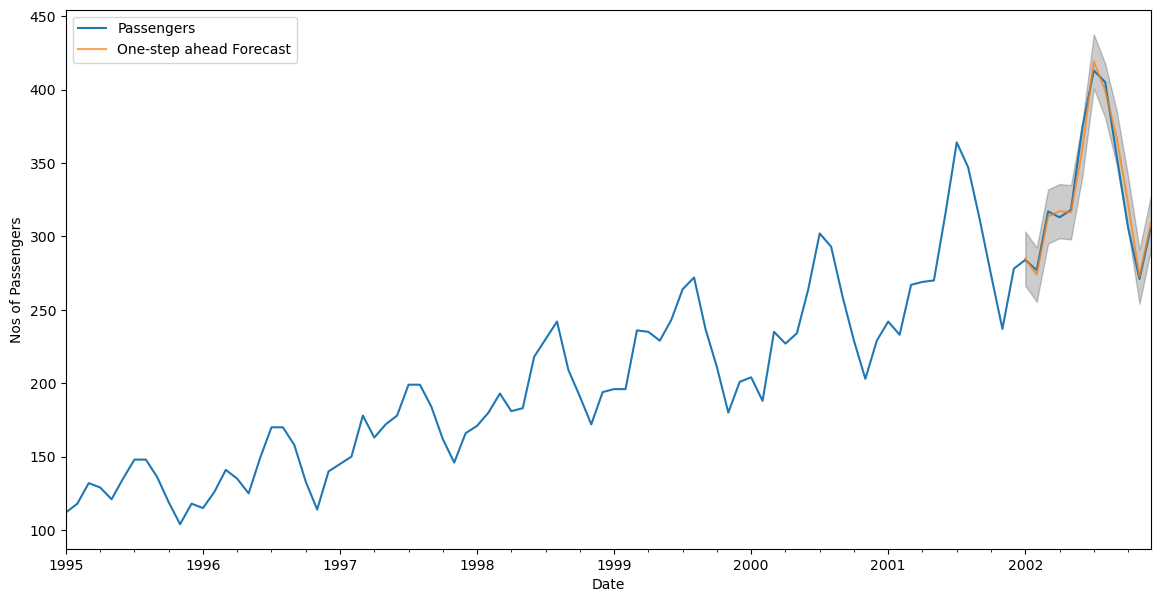

In [22]:
# Visualization of predictions 
pred = result.get_prediction(start=pd.to_datetime('2002-01-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = airline['1995':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Nos of Passengers')
plt.legend()
plt.show()

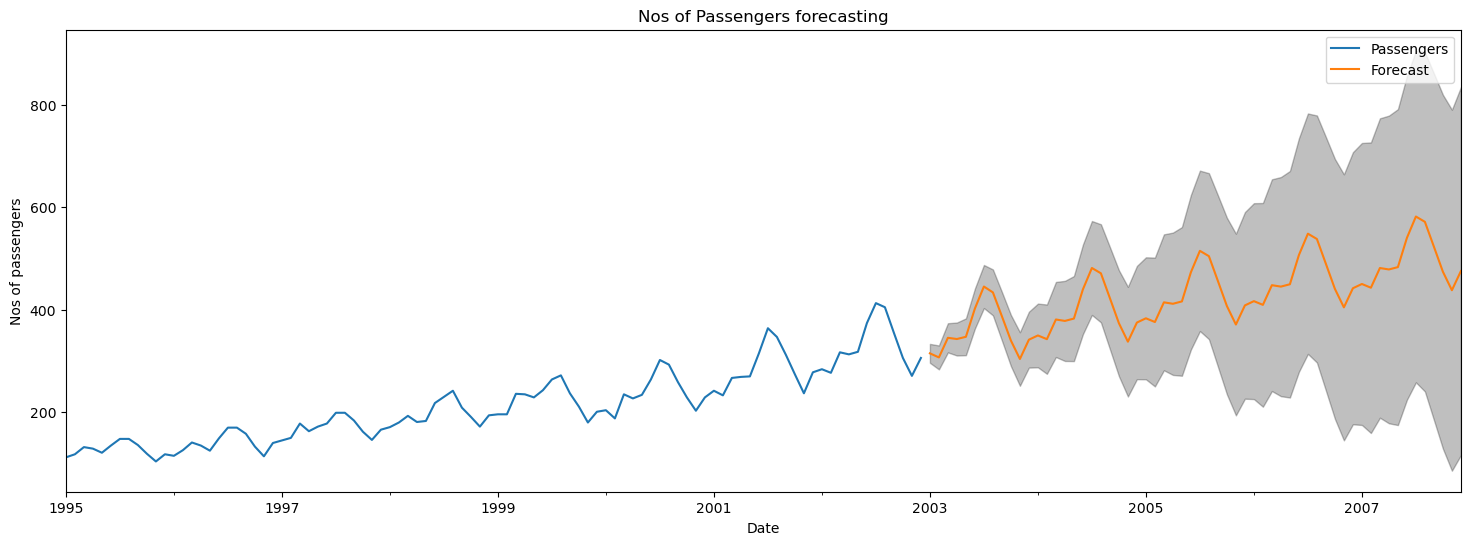

In [23]:
# Forecasting for 5 years
pred_uc = result.get_forecast(steps=60)
pred_ci = pred_uc.conf_int()
ax = airline.plot(label='observed', figsize=(18, 6))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Nos of passengers')
plt.legend(loc='best')
plt.title('Nos of Passengers forecasting')
plt.show()

#### Prophet

22:22:32 - cmdstanpy - INFO - Chain [1] start processing
22:22:33 - cmdstanpy - INFO - Chain [1] done processing


Text(0.5, 1.0, 'Nos of Passengers forecasting')

<Figure size 1800x600 with 0 Axes>

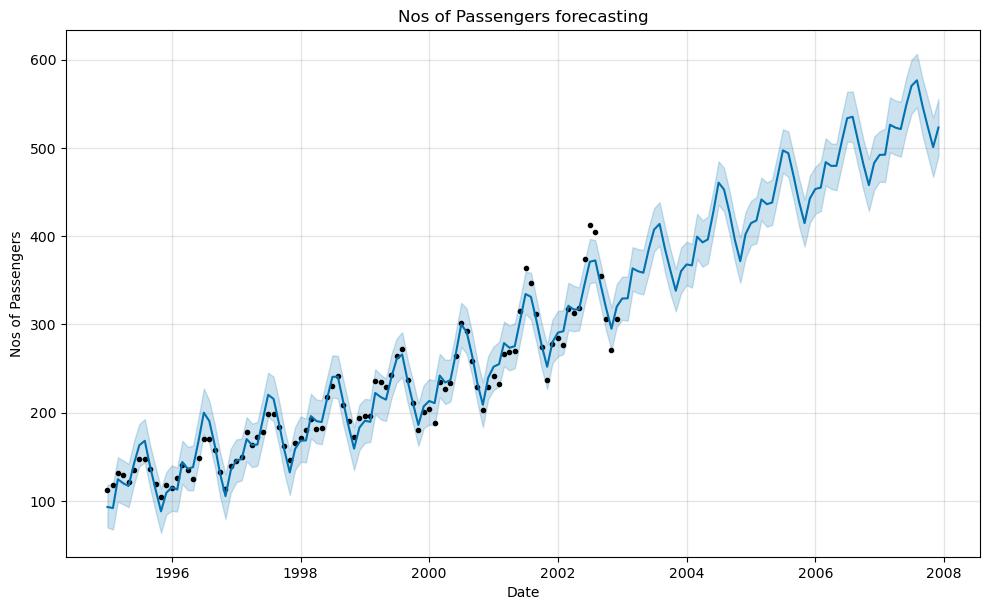

In [24]:
# Forecasting model using prophet

# Dataframe resetting to fit prophet model
airline = airline.reset_index()
airline = airline.rename(columns={'Month': 'ds', 'Passengers': 'y'})

# Model initialization and fitting
prophet_model = Prophet(interval_width=0.95)
prophet_model.fit(airline)

# Forecasting for 5 years
forecast = prophet_model.make_future_dataframe(periods=60, freq='MS')
forecast = prophet_model.predict(forecast)

# Visualization
plt.figure(figsize=(18, 6))
prophet_model.plot(forecast, xlabel = 'Date', ylabel = 'Nos of Passengers')
plt.title('Nos of Passengers forecasting')

### Problem statement - 2

Forecast the CocaCola prices data set. Prepare a document for each model explaining how many dummy variables you have created and RMSE value for each model. Finally which model you will use for Forecasting.

#### Exploratory Data Analysis

In [25]:
# Loading dataset
cocacola = pd.read_excel(r".\CocaCola_Sales_Rawdata.xlsx")

# View dataset
cocacola.head()

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996


In [26]:
#1. Shape of dataset
cocacola.shape

(42, 2)

In [27]:
#2. Technical information
cocacola.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Quarter  42 non-null     object 
 1   Sales    42 non-null     float64
dtypes: float64(1), object(1)
memory usage: 804.0+ bytes


In [28]:
#3. Presence of duplicate values
cocacola.duplicated().sum()

0

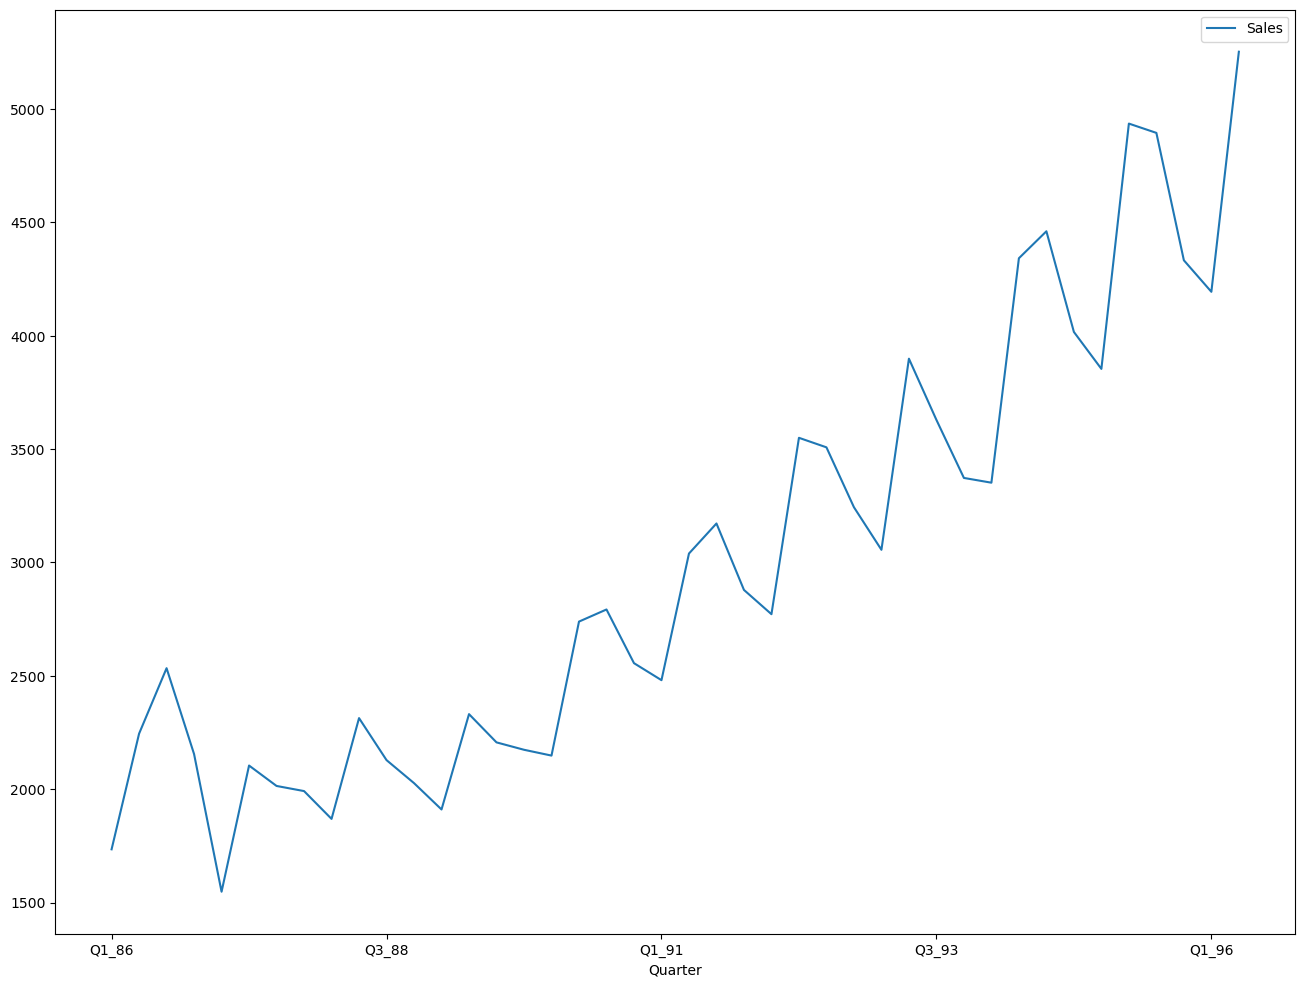

In [29]:
#4. Visualization
cocacola.plot(kind='line', x='Quarter', y='Sales')
plt.legend(loc='best')
plt.show()

Observation:
1. Dataset has 42 records and 2 columns.
2. Quarter column Data type is inconsistent and needs to be converted to datetime. 
3. No null values and duplicates present.

In [30]:
# Conversion of Quarter column data type to datetime

cocacola['Quarter_Date'] = pd.date_range('1986-06-30', periods=42, freq='Q')
cocacola = cocacola.drop('Quarter', axis=1)
cocacola.head()

,Sales,Quarter_Date
0,1734.827000,1986-06-30
1,2244.960999,1986-09-30
2,2533.804993,1986-12-31
3,2154.962997,1987-03-31
4,1547.818996,1987-06-30


In [31]:
#Checking data type
cocacola.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Sales         42 non-null     float64       
 1   Quarter_Date  42 non-null     datetime64[ns]
dtypes: datetime64[ns](1), float64(1)
memory usage: 804.0 bytes


In [32]:
# Setting index
cocacola = cocacola.set_index('Quarter_Date')
cocacola

,Sales
Quarter_Date,
1986-06-30,1734.827000
1986-09-30,2244.960999
1986-12-31,2533.804993
1987-03-31,2154.962997
1987-06-30,1547.818996
1987-09-30,2104.411995
1987-12-31,2014.362999
1988-03-31,1991.746998
1988-06-30,1869.049999


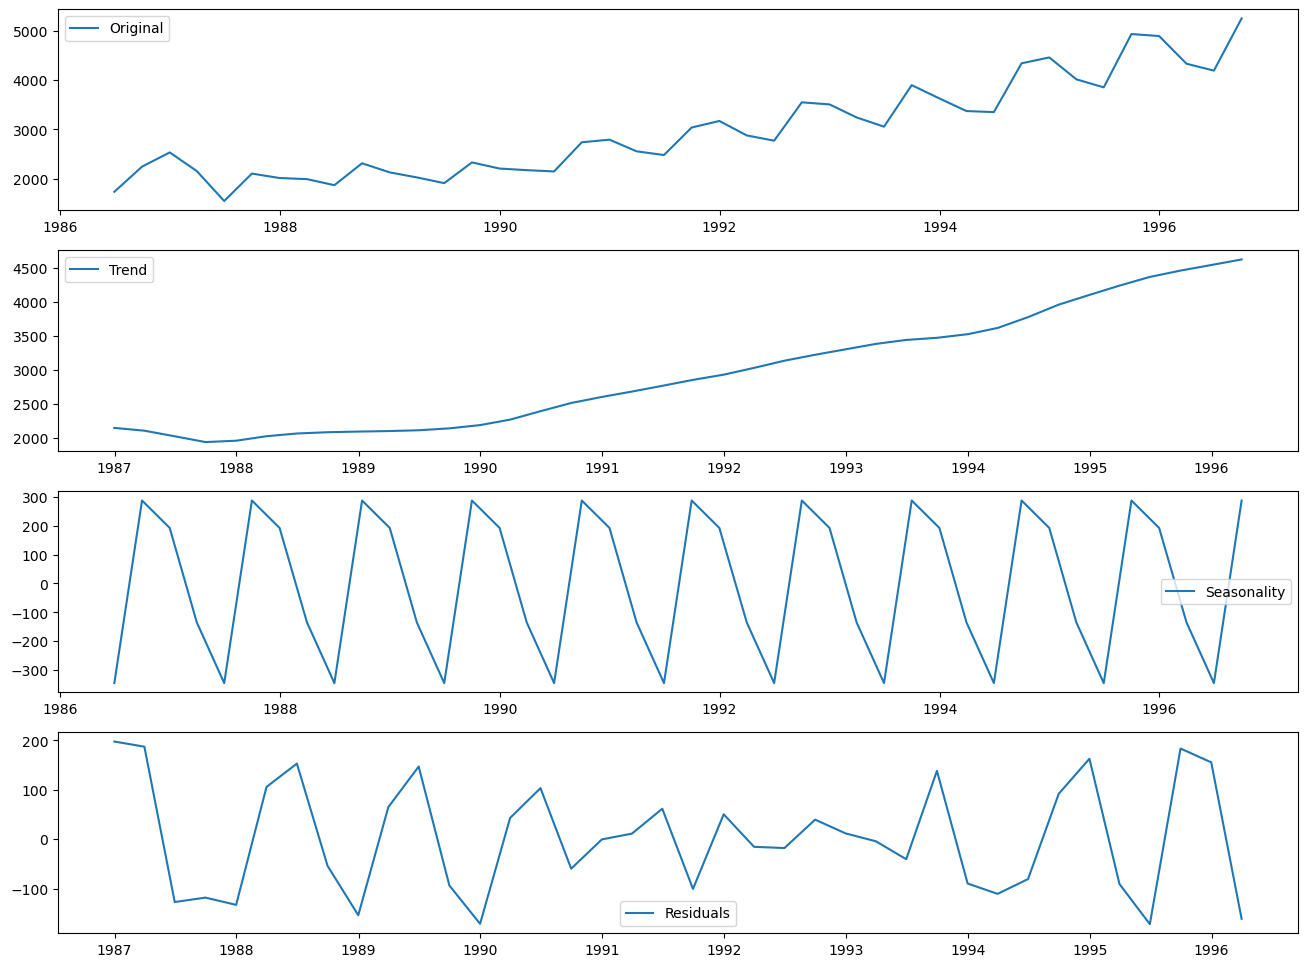

In [33]:
# checking trend, Seasonality and Residuals
rcParams['figure.figsize'] = (16, 12)

decomposition = seasonal_decompose(cocacola)
trend = decomposition.trend
seasonal = decomposition.seasonal
residuals = decomposition.resid

plt.subplot(411)
plt.plot(cocacola, label='Original')
plt.legend(loc='best')

plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')

plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='best')

plt.subplot(414)
plt.plot(residuals, label='Residuals')
plt.legend(loc='best')
plt.show()

In [34]:
# Checking stationarity of dataset

adftest = adfuller(cocacola)
if adftest[1] > 0.05:
    print(f'No Stationarity in Dataset since pvlaue {adftest[1]} > 0.05')
else:
    print(f'Stationarity exists in the Dataset since pvlaue {adftest[1]} < 0.05')

No Stationarity in Dataset since pvlaue 0.9966611673930905 > 0.05


Observation:
1. Up trend and seasonality can be observed in the dataset
2. Dataset is not stationary.
3. Since, seasonality exists in the dataset SARIMAX model has to be used for forecasting. 

#### SARIMAX

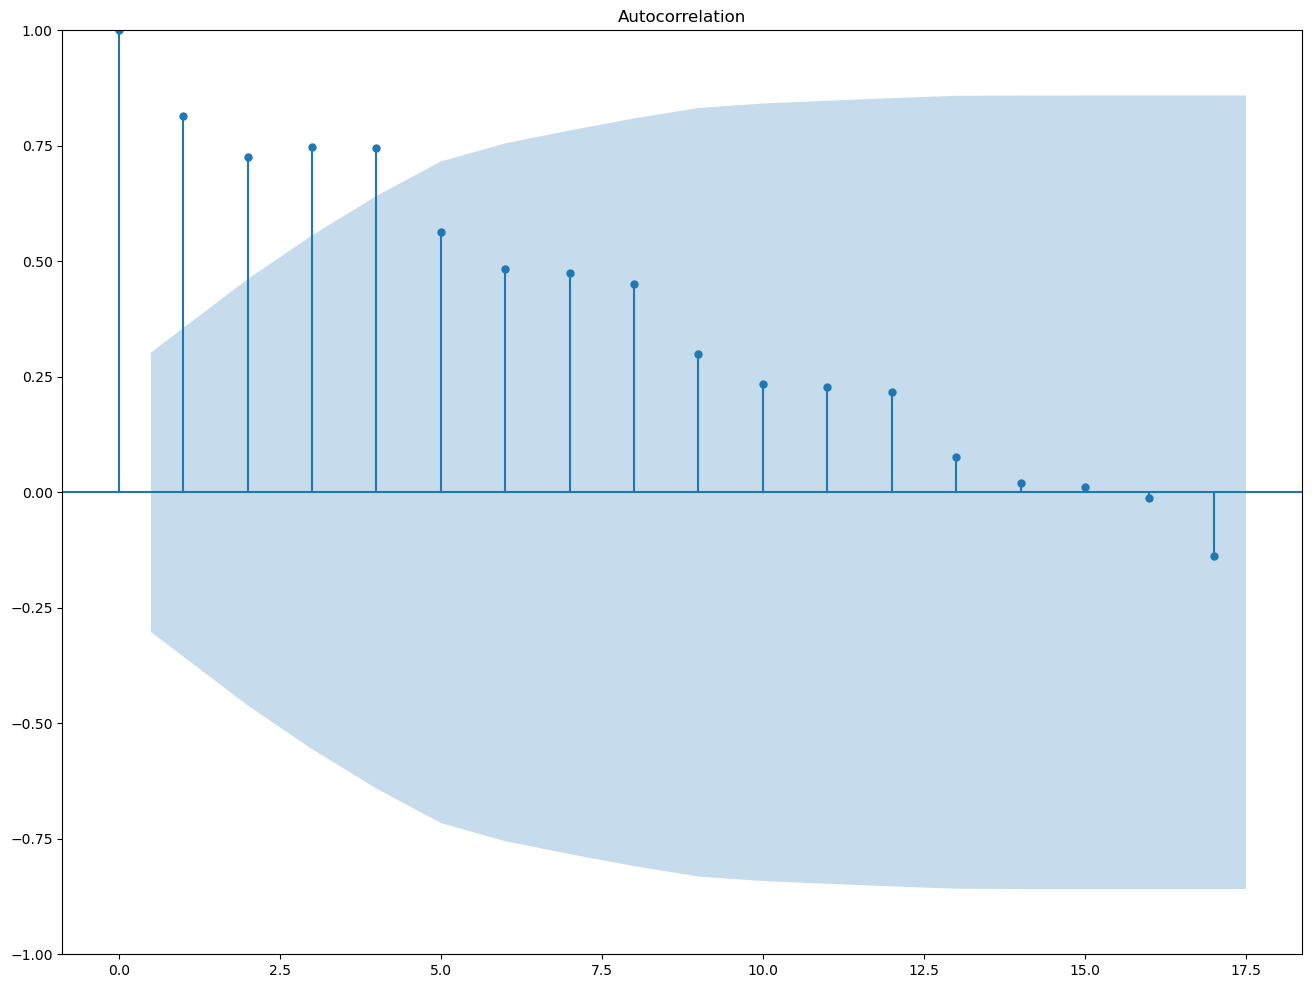

In [35]:
# Fitting SARIMAX model for forecasting
# Finding p, d, q values using acf and pacf plots

acf = plot_acf(cocacola['Sales'])
# acf plot gives p value and here it is 4. 4 points crossing upper bound

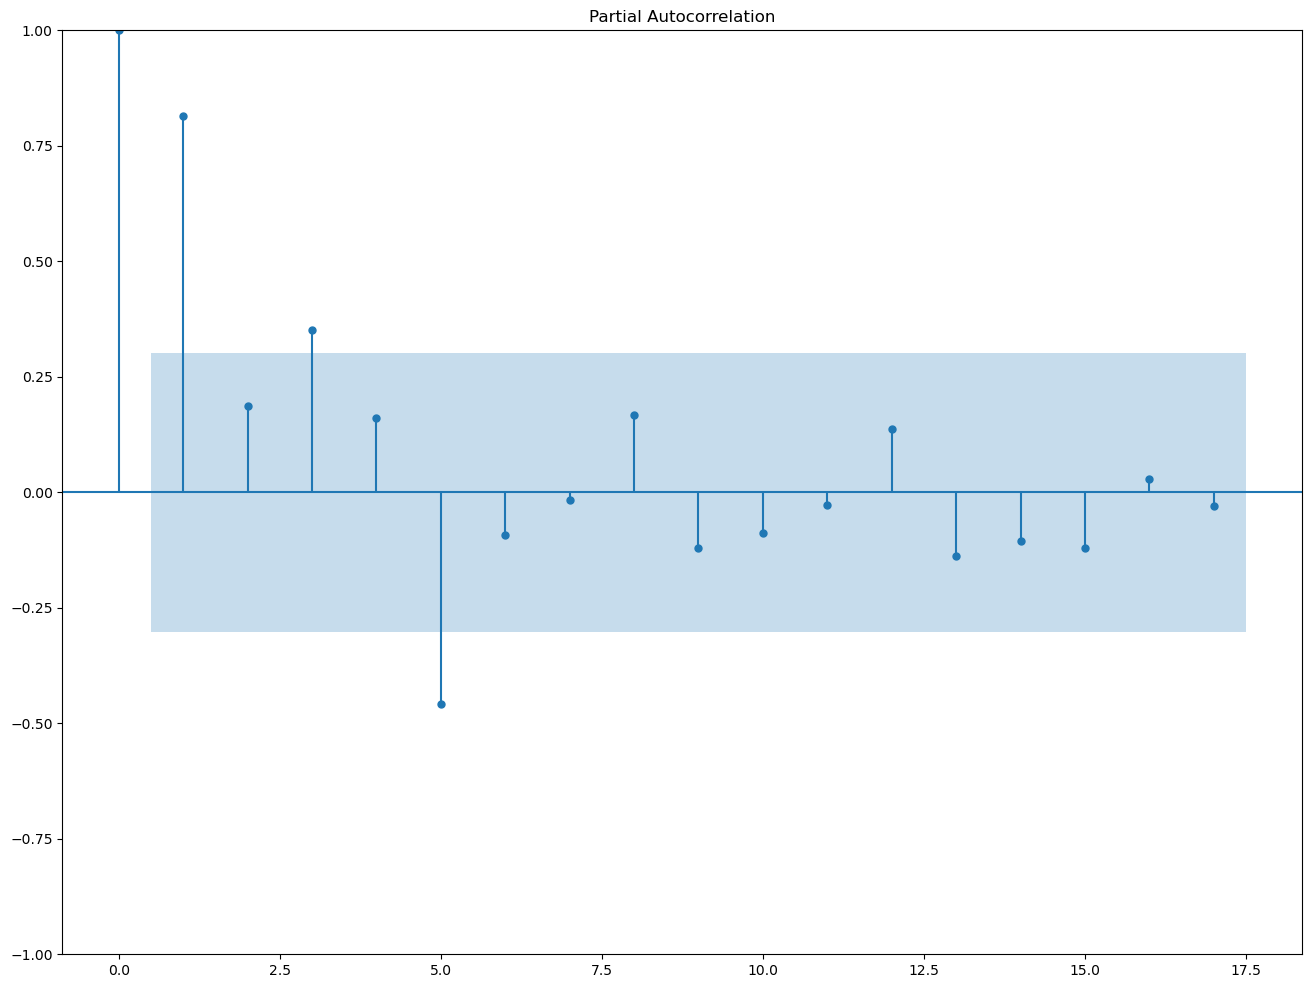

In [36]:
pacf = plot_pacf(cocacola['Sales'])
# acf plot gives p value and here it is 3. 3 points crossing upper bound

In [37]:
# No differencing done i.e. d = 0
sarima = sarimax.SARIMAX(cocacola, order=(4, 0, 3), seasonal_order=(1, 0, 1, 12))
result = sarima.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                Sales   No. Observations:                   42
Model:             SARIMAX(4, 0, 3)x(1, 0, [1], 12)   Log Likelihood                -287.451
Date:                              Sun, 24 Dec 2023   AIC                            594.903
Time:                                      22:23:36   BIC                            612.279
Sample:                                  06-30-1986   HQIC                           601.272
                                       - 09-30-1996                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0867      0.162      0.535      0.593      -0.231       0.404
ar.L2         -0.0979      0.127     -0.773      0.440      -0.346       0.150
ar.L3          0.3618      0.119      3.028      0.002       0.128       0.596
ar.L4          0.6483      0.193      3.363      0.001       0.271       1.026
ma.L1          1.1162      0.231      4.830      0.000       0.663       1.569
ma.L2          0.8526      0.321      2.656      0.008       0.223       1.482
ma.L3         -0.1152      0.253     -0.456      0.649      -0.611       0.380
ar.S.L12       0.9538      0.168      5.667      0.000       0.624       1.284
ma.S.L12      -0.6608      0.569     -1.162      0.245      -1.775       0.454
sigma2      1.603e+04   2.71e-05   5.91e+08      0.000     1.6e+04     1.6e+04
===================================================================================
Ljung-Box (L1) (Q):                   1.19   Jarque-Bera (JB):                 0.34
Prob(Q):                              0.28   Prob(JB):                         0.84
Heteroskedasticity (H):               1.26   Skew:                            -0.13
Prob(H) (two-sided):                  0.67   Kurtosis:                         2.65
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.07e+24. Standard errors may be unstable.
"""

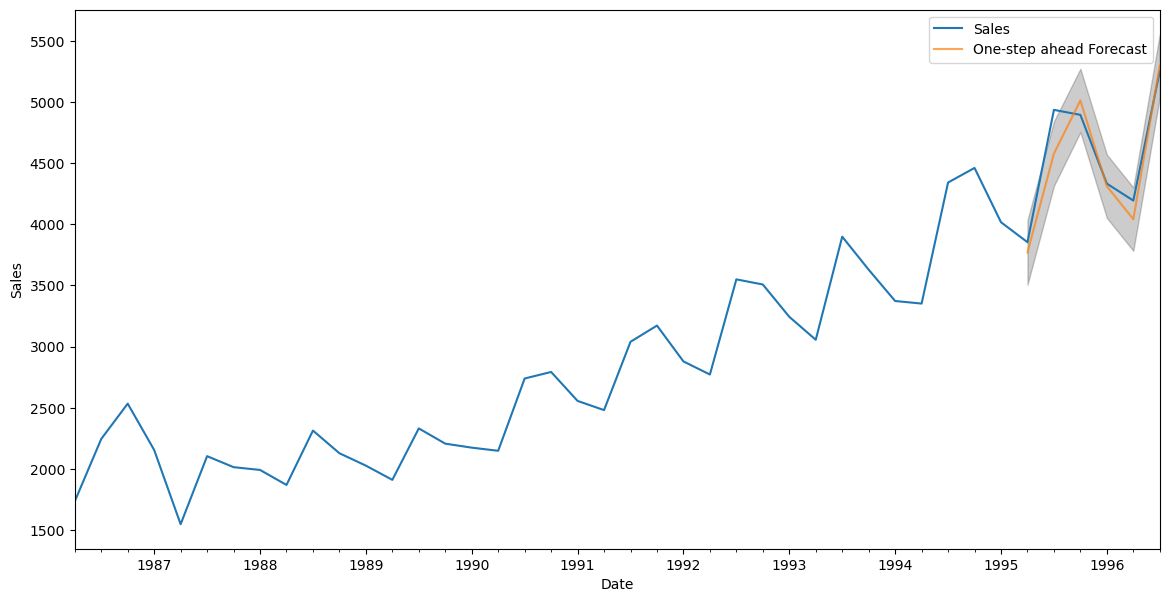

In [38]:
# Visualization of predictions 
pred = result.get_prediction(start=pd.to_datetime('1995-06-30'), dynamic=False)
pred_ci = pred.conf_int()
ax = cocacola['1986':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Sales')
plt.legend()
plt.show()

In [39]:
y_forecasted = pred.predicted_mean[1]
y_truth = cocacola['1995-06-30':]
mse = ((y_forecasted - y_truth) ** 2).mean()

print('The Mean Squared Error of our forecasts is {}'.format(round(mse['Sales'], 2)))
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse['Sales']), 2)))

The Mean Squared Error of our forecasts is 235989.08
The Root Mean Squared Error of our forecasts is 485.79


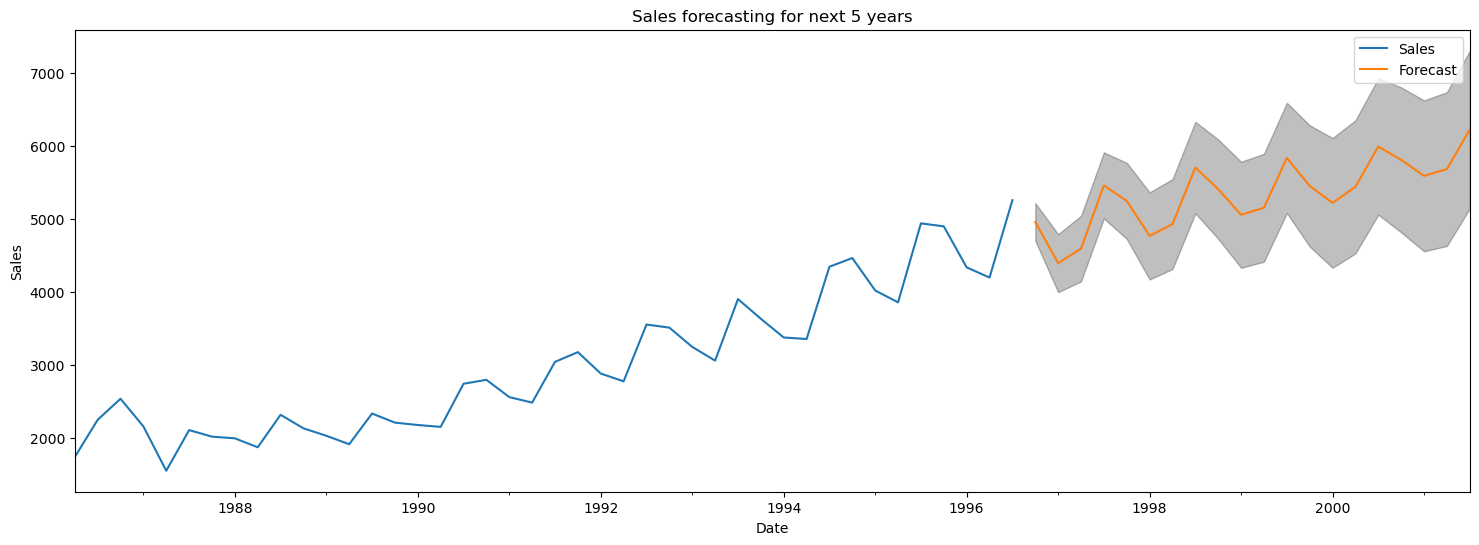

In [40]:
# Forecasting for 5 years
pred_uc = result.get_forecast(steps=20)
pred_ci = pred_uc.conf_int()
ax = cocacola.plot(label='observed', figsize=(18, 6))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Sales')
plt.legend(loc='best')
plt.title('Sales forecasting for next 5 years')
plt.show()

In [41]:
# Findng rmse values using different variables
p = q = range(0, 3)
d = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 0, 2, 12)
SARIMAX: (0, 0, 2) x (0, 1, 0, 12)
SARIMAX: (0, 0, 2) x (0, 1, 1, 12)


In [42]:
aic = 1000
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(cocacola,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            pred = results.get_prediction(start=pd.to_datetime('1995-06-30'), dynamic=False)
            y_forecasted = pred.predicted_mean[1]
            y_truth = cocacola['1995-06-30':]
            mse = ((y_forecasted - y_truth) ** 2).mean()
            rmse = round(np.sqrt(mse['Sales']), 2)
            print('ARIMA{}x{}12 - AIC:{} - RMSE:{}'.format(param, param_seasonal, results.aic, rmse))
            
            if results.aic < aic:
                rmse_value = rmse
                Order = param
                Seasonal_order = param_seasonal
                aic = results.aic
        except:
                continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:779.4776901515575 - RMSE:4603.2
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1255.6680229725143 - RMSE:4603.2
ARIMA(0, 0, 0)x(0, 0, 2, 12)12 - AIC:302.4699740931398 - RMSE:1785.82
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:483.78857078238417 - RMSE:1136.55
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:283.75690581619887 - RMSE:498.23
ARIMA(0, 0, 0)x(0, 1, 2, 12)12 - AIC:81.8534242547156 - RMSE:506.92
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:440.67089543801274 - RMSE:530.82
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:416.0245806694089 - RMSE:551.92
ARIMA(0, 0, 0)x(1, 0, 2, 12)12 - AIC:230.39379334887906 - RMSE:566.57
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:284.4461613360769 - RMSE:658.39
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:271.03840547932793 - RMSE:665.22
ARIMA(0, 0, 0)x(1, 1, 2, 12)12 - AIC:60.76295198282177 - RMSE:580.71
ARIMA(0, 0, 0)x(2, 0, 0, 12)12 - AIC:227.89137224954086 - RMSE:547.72
ARIMA(0, 0, 0)x(2, 0, 1, 12)12 - AIC:230.62830655007446 - RMSE:536.13
ARIMA(0, 0, 0)x(2, 0, 2, 

ARIMA(1, 0, 0)x(1, 1, 1, 12)12 - AIC:235.90081644906024 - RMSE:505.8
ARIMA(1, 0, 0)x(1, 1, 2, 12)12 - AIC:62.74387670698776 - RMSE:578.72
ARIMA(1, 0, 0)x(2, 0, 0, 12)12 - AIC:215.06456571666976 - RMSE:557.9
ARIMA(1, 0, 0)x(2, 0, 1, 12)12 - AIC:215.66536259576685 - RMSE:586.17
ARIMA(1, 0, 0)x(2, 0, 2, 12)12 - AIC:219.14189913074506 - RMSE:560.0
ARIMA(1, 0, 0)x(2, 1, 0, 12)12 - AIC:60.74289616991945 - RMSE:578.72
ARIMA(1, 0, 0)x(2, 1, 1, 12)12 - AIC:72.24474006014358 - RMSE:645.44
ARIMA(1, 0, 0)x(2, 1, 2, 12)12 - AIC:65.41348769905858 - RMSE:587.21
ARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:591.6552225153733 - RMSE:564.18
ARIMA(1, 0, 1)x(0, 0, 1, 12)12 - AIC:2181.716001582206 - RMSE:50780404024.09
ARIMA(1, 0, 1)x(0, 0, 2, 12)12 - AIC:244.92878344539213 - RMSE:486.75
ARIMA(1, 0, 1)x(0, 1, 0, 12)12 - AIC:393.4819173121559 - RMSE:489.31
ARIMA(1, 0, 1)x(0, 1, 1, 12)12 - AIC:221.45946010269634 - RMSE:502.46
ARIMA(1, 0, 1)x(0, 1, 2, 12)12 - AIC:55.792604840563655 - RMSE:557.37
ARIMA(1, 0, 1)x(1, 0, 

ARIMA(2, 0, 1)x(0, 0, 2, 12)12 - AIC:243.54799061948214 - RMSE:485.97
ARIMA(2, 0, 1)x(0, 1, 0, 12)12 - AIC:395.24000782795775 - RMSE:488.45
ARIMA(2, 0, 1)x(0, 1, 1, 12)12 - AIC:224.01895522214008 - RMSE:490.76
ARIMA(2, 0, 1)x(0, 1, 2, 12)12 - AIC:98.7544177755357 - RMSE:9168.4
ARIMA(2, 0, 1)x(1, 0, 0, 12)12 - AIC:383.54985751569524 - RMSE:601.66
ARIMA(2, 0, 1)x(1, 0, 1, 12)12 - AIC:395.9327200435807 - RMSE:578.77
ARIMA(2, 0, 1)x(1, 0, 2, 12)12 - AIC:206.58296618204275 - RMSE:562.15
ARIMA(2, 0, 1)x(1, 1, 0, 12)12 - AIC:226.23379544132825 - RMSE:489.44
ARIMA(2, 0, 1)x(1, 1, 1, 12)12 - AIC:234.44176532933477 - RMSE:485.83
ARIMA(2, 0, 1)x(1, 1, 2, 12)12 - AIC:98.93858650707668 - RMSE:8960.87
ARIMA(2, 0, 1)x(2, 0, 0, 12)12 - AIC:226.44656980455773 - RMSE:549.0
ARIMA(2, 0, 1)x(2, 0, 1, 12)12 - AIC:229.3891450627665 - RMSE:572.9
ARIMA(2, 0, 1)x(2, 0, 2, 12)12 - AIC:230.73600498713347 - RMSE:562.57
ARIMA(2, 0, 1)x(2, 1, 0, 12)12 - AIC:71.11787016914445 - RMSE:925.13
ARIMA(2, 0, 1)x(2, 1, 1, 12

In [43]:
print('Best parameters p, d, q order and seasonal order: ')
print('ARIMA{}x{}12 - AIC:{} - RMSE:{}'.format(Order, Seasonal_order, aic, rmse_value))

Best parameters p, d, q order and seasonal order: 
ARIMA(2, 1, 2)x(0, 1, 2, 12)12 - AIC:1.1393501816664795 - RMSE:618.21


In [44]:
# Best model fitting
sarima = sarimax.SARIMAX(cocacola, order=Order, seasonal_order=Seasonal_order)
result = sarima.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              Sales   No. Observations:                   42
Model:             SARIMAX(2, 1, 2)x(0, 1, 2, 12)   Log Likelihood                -194.983
Date:                            Sun, 24 Dec 2023   AIC                            403.967
Time:                                    22:29:36   BIC                            413.538
Sample:                                06-30-1986   HQIC                           406.964
                                     - 09-30-1996                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1404      0.141      0.996      0.319      -0.136       0.417
ar.L2         -0.9966      0.039    -25.660      0.000      -1.073      -0.921
ma.L1         -0.2144      0.216     -0.991      0.322      -0.639       0.210
ma.L2          0.9175      0.706      1.299      0.194      -0.467       2.302
ma.S.L12      -0.6210      0.674     -0.921      0.357      -1.942       0.700
ma.S.L24       0.2113      0.924      0.229      0.819      -1.601       2.023
sigma2      3.307e+04   2.78e+04      1.189      0.235   -2.15e+04    8.76e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 0.06
Prob(Q):                              0.93   Prob(JB):                         0.97
Heteroskedasticity (H):               0.31   Skew:                            -0.04
Prob(H) (two-sided):                  0.08   Kurtosis:                         2.79
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

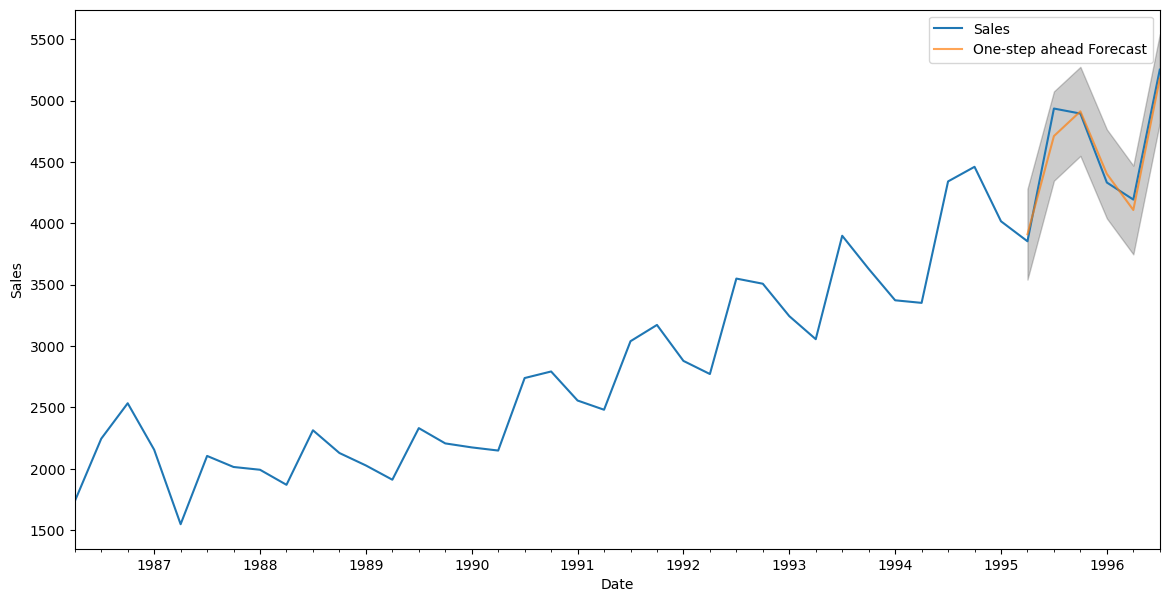

In [45]:
# Visualization of predictions 
pred = result.get_prediction(start=pd.to_datetime('1995-06-30'), dynamic=False)
pred_ci = pred.conf_int()
ax = cocacola['1986':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Sales')
plt.legend()
plt.show()

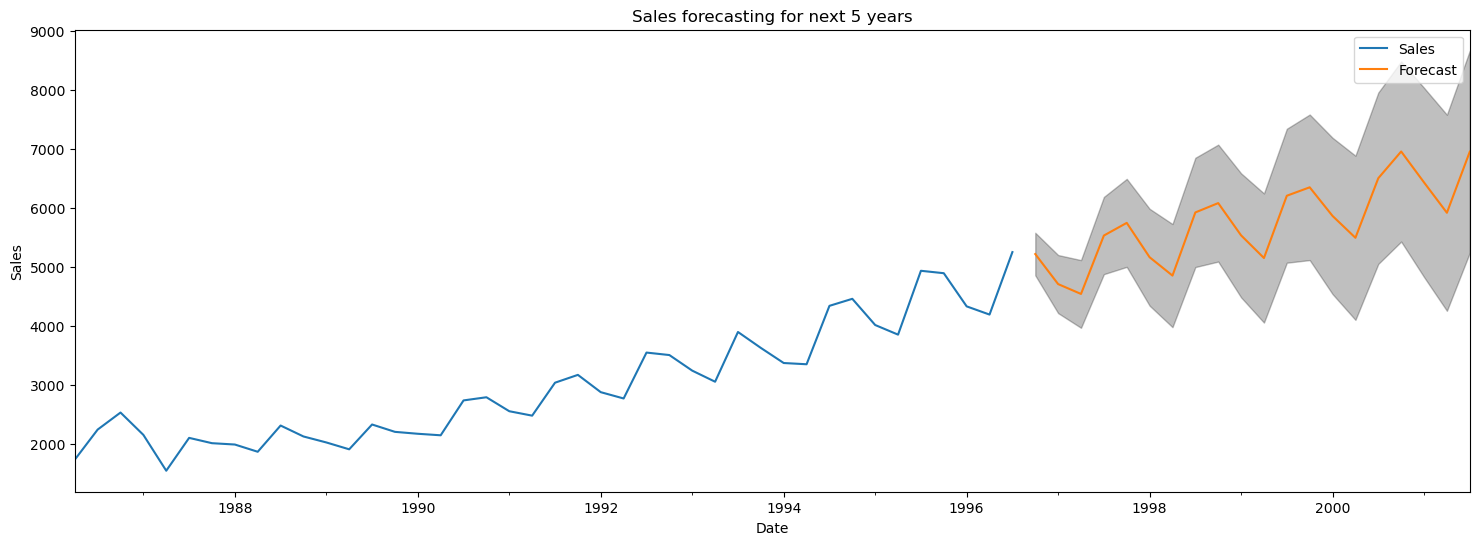

In [46]:
# Forecasting for 5 years
pred_uc = result.get_forecast(steps=20)
pred_ci = pred_uc.conf_int()
ax = cocacola.plot(label='observed', figsize=(18, 6))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Sales')
plt.legend(loc='best')
plt.title('Sales forecasting for next 5 years')
plt.show()

#### Prophet

22:30:23 - cmdstanpy - INFO - Chain [1] start processing
22:30:23 - cmdstanpy - INFO - Chain [1] done processing


<Figure size 1800x600 with 0 Axes>

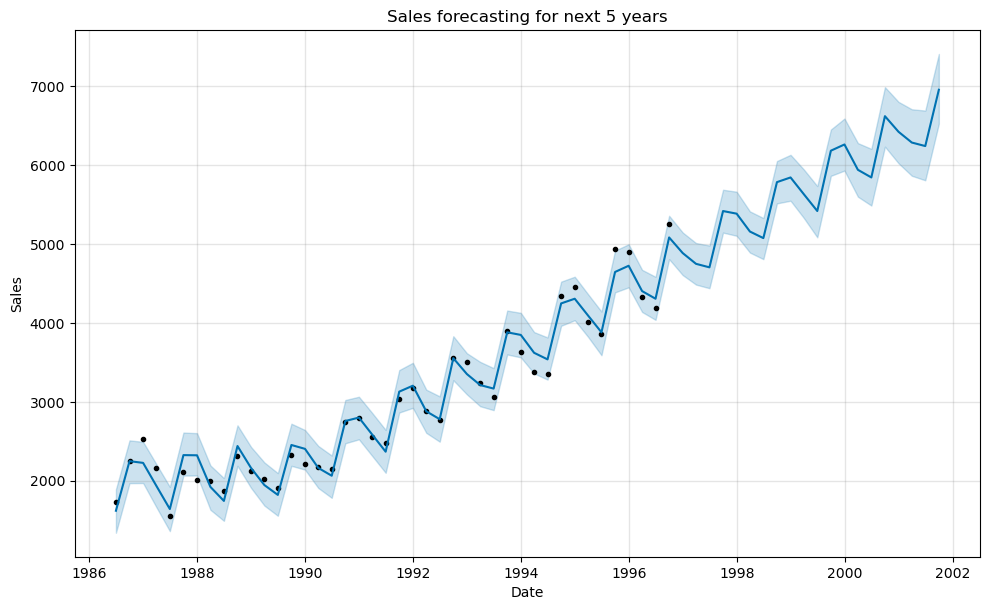

In [47]:
# Forecasting model using prophet

# Dataframe resetting to fit prophet model
cocacola = cocacola.reset_index()
cocacola = cocacola.rename(columns={'Quarter_Date': 'ds', 'Sales': 'y'})

# Model initialization and fitting
prophet_model = Prophet(interval_width=0.95)
prophet_model.fit(cocacola)

# Forecasting for 5 years
forecast = prophet_model.make_future_dataframe(periods=20, freq='Q')
forecast = prophet_model.predict(forecast)

# Visualization
plt.figure(figsize=(18, 6))
prophet_model.plot(forecast, xlabel = 'Date', ylabel = 'Sales')
plt.title('Sales forecasting for next 5 years')
plt.show()